<a href="https://colab.research.google.com/github/mou135/CBTCIP/blob/main/Prediction_of_Employ_turnover.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Prediction of Employ turnover**    Binary Classification



1.Importing Libaries and data *set*

2.Exploratory Data Analysis   [for analyzing the data]

3..Data preprocessing

4.Creating Variables for catagorial variables

5.Modeling with Logistic regression

6Modeling with Random Forest

7.Accuracy check

In [ ]:
#importing the libaries
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt

In [ ]:
#importing the dataset

URL= "https://drive.google.com/file/d/1VksVa65EhEwB9Wiokd-V_E_JddoyMZN0/view?usp=sharing"
path = "/content/drive/MyDrive/HR_comma_sep.csv" +URL.split('/')[-2]




In [ ]:
#Mount Google Drive
from google.colab import drive
drive.mount('/content/drive')

# Correct file path
path = '/content/drive/MyDrive/HR_comma_sep.csv'



Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# Read the CSV file
df = pd.read_csv(path)

df.head() # return the 5 top rows and columns

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,sales,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


+URL.split('/')[-2] =Enter split URL testing, a powerful technique that allows you to compare two or more versions of a web page to determine which one performs better. It's like having a toolbox full of different tools, and you want to know which one gets the job done efficiently.

df means-  A dataframe is a data structure constructed with rows and columns.

read_csv() function is used to read CSV files into a DataFrame. To open a file with pandas using relative path, we simply need to pass the relative path to the read_csv() function using df = pd.read_csv(path)

The head() method returns a specified number of rows, string from the top. The head() method returns the first 5 rows if a number is not specified. Note: The column names will also be returned, in addition to the specified rows.

In [ ]:
df.tail()  # Returns last 5 bottoms rows and columns

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,sales,salary
14994,0.40,0.57,2,151,3,0,1,0,support,low
14995,0.37,0.48,2,160,3,0,1,0,support,low
14996,0.37,0.53,2,143,3,0,1,0,support,low
14997,0.11,0.96,6,280,4,0,1,0,support,low
14998,0.37,0.52,2,158,3,0,1,0,support,low


The df.shape method provides information about the number of rows and columns in a DataFrame quickly and easily.

Key takeaway: df.shape is your go-to function for finding the size of a DataFrame

With the shape() method, comes the flexibility to obtain the dimensions of any Python object. Yes, it returns a tuple value that indicates the dimensions of a Python object.

In [ ]:
df.shape

(14999, 10)

In [ ]:
df.columns      # checking the columns in the dataset

Index(['satisfaction_level', 'last_evaluation', 'number_project',
       'average_montly_hours', 'time_spend_company', 'Work_accident', 'left',
       'promotion_last_5years', 'sales', 'salary'],
      dtype='object')

What does isna() do in Pandas?
isna() method checks whether the objects of a Dataframe or a Series contain missing or null values (NA, NaN) and returns a new object with the same shape as the original but with boolean values True or False as the elements. True indicates the presence of null or missing values and False indicates otherwise.

df.isna(). sum () = count the number of NaN values in a specific column in a Pandas DataFrame, we can use the isna() and sum() functions. The isna() function returns a Boolean value of True if the value is NaN and False otherwise. The sum() function returns the sum of True values, which equals the number of NaN values in the column.

In [ ]:
df.isna(). sum ()

satisfaction_level       0
last_evaluation          0
number_project           0
average_montly_hours     0
time_spend_company       0
Work_accident            0
left                     0
promotion_last_5years    0
sales                    0
salary                   0
dtype: int64

In [ ]:
df.duplicated(keep="first").sum() #Checking the duplicates

3008

In [ ]:
df.drop_duplicates (inplace=True) #Identifing the duplicates for dropping

df.shape #Checking the shape after dropping

(11991, 10)

In [ ]:
df.info() #checking the info regarding non-null values, count, datatype

<class 'pandas.core.frame.DataFrame'>
Index: 11991 entries, 0 to 11999
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   satisfaction_level     11991 non-null  float64
 1   last_evaluation        11991 non-null  float64
 2   number_project         11991 non-null  int64  
 3   average_montly_hours   11991 non-null  int64  
 4   time_spend_company     11991 non-null  int64  
 5   Work_accident          11991 non-null  int64  
 6   left                   11991 non-null  int64  
 7   promotion_last_5years  11991 non-null  int64  
 8   sales                  11991 non-null  object 
 9   salary                 11991 non-null  object 
dtypes: float64(2), int64(6), object(2)
memory usage: 1.0+ MB


#Exploratory Data Analysis   [for analyzing the data]

Monthly Hours (To check how many hours the employees spend in the office in the specific months)

In [ ]:
df["average_montly_hours"].unique()

array([157, 262, 272, 223, 159, 153, 247, 259, 224, 142, 135, 305, 234,
       148, 137, 143, 160, 255, 282, 147, 304, 139, 158, 242, 239, 128,
       132, 294, 134, 145, 140, 246, 126, 306, 152, 269, 127, 281, 276,
       182, 273, 307, 309, 225, 226, 308, 244, 286, 161, 264, 277, 275,
       149, 295, 151, 249, 291, 232, 130, 129, 155, 265, 279, 284, 221,
       154, 150, 267, 257, 177, 144, 289, 258, 263, 251, 133, 216, 300,
       138, 260, 183, 250, 292, 283, 245, 256, 278, 240, 136, 301, 243,
       296, 274, 164, 146, 261, 285, 141, 297, 156, 287, 219, 254, 228,
       131, 252, 236, 270, 298, 192, 248, 266, 238, 229, 233, 268, 231,
       253, 302, 271, 290, 235, 293, 241, 218, 199, 180, 195, 237, 227,
       172, 206, 181, 217, 310, 214, 198, 211, 222, 213, 202, 184, 204,
       288, 220, 299, 303, 212, 196, 179, 205, 230, 203, 280, 169, 188,
       178, 175, 166, 163, 168, 165, 189, 162, 215, 193, 176, 191, 174,
       201, 208, 171, 111, 104, 106, 100, 194, 209, 185, 200, 20

group a continuous variable into a set of discrete intervals,  This process is called binning, and it can help you simplify your analysis and gain insights from the data.

Data binning is a type of data preprocessing, a mechanism which includes also dealing with missing values, formatting, normalization and standardization. Binning can be applied to convert numeric values to categorical or to sample (quantise) numeric values.

In [ ]:
bins = len(df["average_montly_hours"].unique())
bins #output the numb of bins

215

In [ ]:
sns.histplot

<function seaborn.distributions.histplot(data=None, *, x=None, y=None, hue=None, weights=None, stat='count', bins='auto', binwidth=None, binrange=None, discrete=None, cumulative=False, common_bins=True, common_norm=True, multiple='layer', element='bars', fill=True, shrink=1, kde=False, kde_kws=None, line_kws=None, thresh=0, pthresh=None, pmax=None, cbar=False, cbar_ax=None, cbar_kws=None, palette=None, hue_order=None, hue_norm=None, color=None, log_scale=None, legend=True, ax=None, **kwargs)>

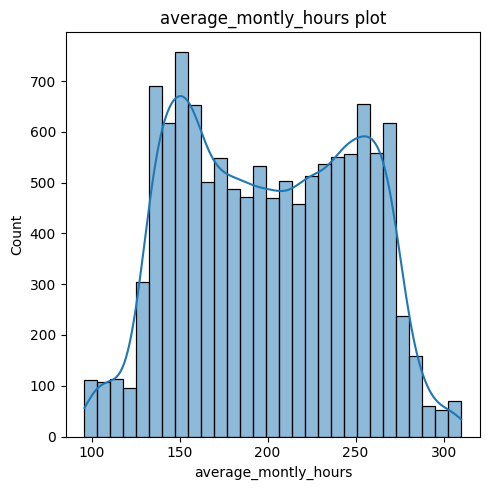

In [ ]:
# Creating a plot for average_montly_hours

plt.figure(figsize=(5,5))
sns.histplot(data=df, x=df["average_montly_hours"],kde=True)    #kde= kernal dense density estimator
plt.title("average_montly_hours plot")
plt.tight_layout() #plot the graph efficiently
plt.show()

Number of Projects

In [ ]:
df["number_project"].value_counts()   #Checking the projects number done by the employees

number_project
4    3685
3    3520
5    2233
2    1582
6     826
7     145
Name: count, dtype: int64

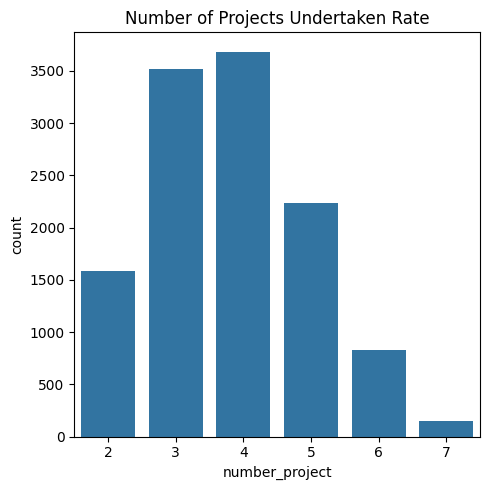

In [ ]:
# Creating the plot for  number_project

plt.figure(figsize=(5,5))
sns.countplot(data=df,x="number_project")
plt.title("Number of Projects Undertaken Rate")
plt.tight_layout()
plt.show()

#Promotion made in last 5 years

In [ ]:
df["promotion_last_5years"].value_counts()

promotion_last_5years
0    11788
1      203
Name: count, dtype: int64

In [ ]:
labels = df["promotion_last_5years"].value_counts().index.tolist()
labels

[0, 1]

In [ ]:
labels = [ "promoted" if i==1 else  "Not promoted" for i in labels ]
labels

['Not promoted', 'promoted']

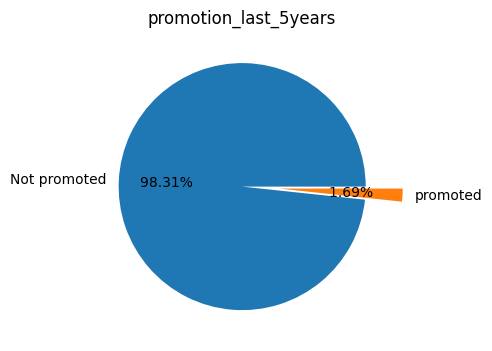

In [ ]:
#ploting the piechart "promotion in last 5 years"

plt.figure(figsize=(5,5))
plt.pie(x=df["promotion_last_5years"].value_counts(),labels=labels, autopct = "%1.2f%% ",explode=[0,0.3] )
plt.title("promotion_last_5years")
plt.tight_layout()
plt.show()

#Work_accident

In [ ]:
df["Work_accident"].value_counts() #checking the number of work_accidents

Work_accident
0    10141
1     1850
Name: count, dtype: int64

In [ ]:
labels = df["Work_accident"].value_counts().index.tolist()
labels

[0, 1]

In [ ]:
labels = [ "Work_accident" if i==1 else  "Not Work_accident" for i in labels ]
labels

['Not Work_accident', 'Work_accident']

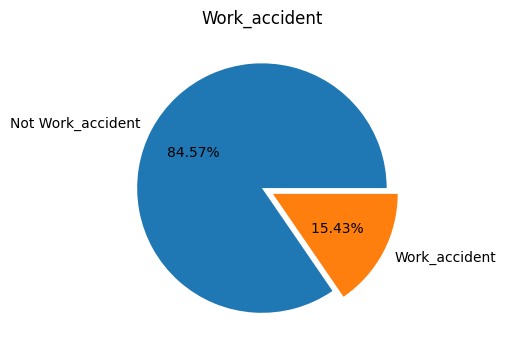

In [ ]:
#ploting the piechart "promotion in last 5 years"
plt.figure(figsize=(5,5))
plt.pie(x=df["Work_accident"].value_counts(),labels=labels, autopct = "%1.2f%% ",explode=[0,0.1] )
plt.title("Work_accident")
plt.tight_layout()
plt.show()


#Time spent in the company

In [ ]:
df["time_spend_company"].value_counts()

time_spend_company
3     5190
2     2910
4     2005
5     1062
6      542
10     107
7       94
8       81
Name: count, dtype: int64

In [ ]:
labels = df["time_spend_company"].value_counts().index.tolist()
labels

[3, 2, 4, 5, 6, 10, 7, 8]

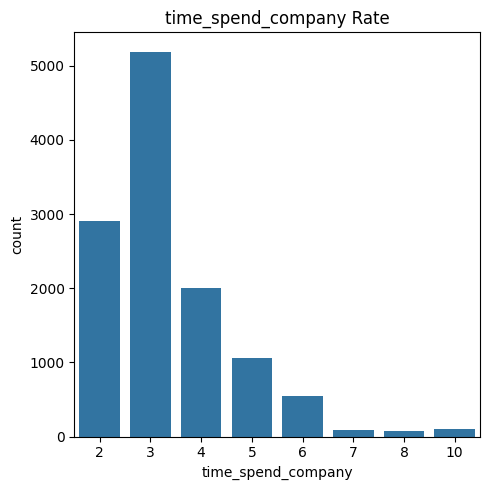

In [ ]:
# Creating the plot for  time_spend_company

plt.figure(figsize=(5,5))
sns.countplot(data=df,x="time_spend_company")
plt.title("time_spend_company Rate")
plt.tight_layout()
plt.show()

#Department Comparison

In [ ]:
df["sales"].unique()

array(['sales', 'accounting', 'hr', 'technical', 'support', 'management',
       'IT', 'product_mng', 'marketing', 'RandD'], dtype=object)

In [ ]:
df["sales"].value_counts()

sales
sales          3239
technical      2244
support        1821
IT              976
RandD           694
product_mng     686
marketing       673
accounting      621
hr              601
management      436
Name: count, dtype: int64

In [ ]:
labels = df["sales"].value_counts().index.tolist()
labels

['sales',
 'technical',
 'support',
 'IT',
 'RandD',
 'product_mng',
 'marketing',
 'accounting',
 'hr',
 'management']

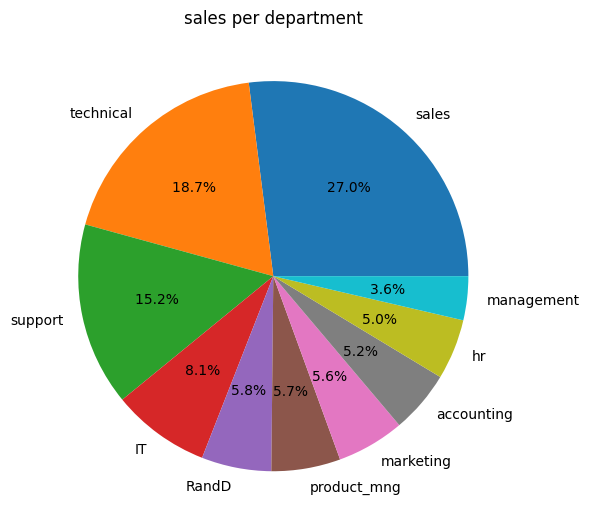

In [ ]:
#ploting the piechart "sales per department"
plt.figure(figsize=(6,6))
plt.pie(x=df["sales"].value_counts(),labels=labels, autopct = "%1.1f%% " )
plt.title("sales per department")
plt.tight_layout()
plt.show()


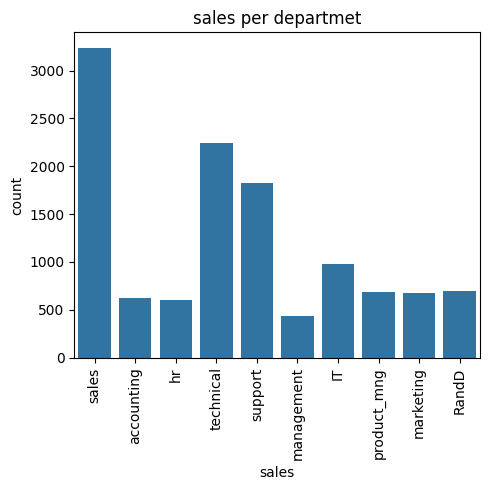

In [ ]:
#ploting the barplot for  "sales per departmet"
plt.figure(figsize=(5,5))
sns.countplot(data=df, x="sales")
plt.xticks(rotation=90)
plt.title("sales per departmet")
plt.tight_layout()
plt.show()

#salary

In [ ]:
df["salary"].unique()

array(['low', 'medium', 'high'], dtype=object)

In [ ]:
df["salary"].value_counts()

salary
low       5740
medium    5261
high       990
Name: count, dtype: int64

In [ ]:
labels = df["salary"].value_counts().index.tolist()
labels

['low', 'medium', 'high']

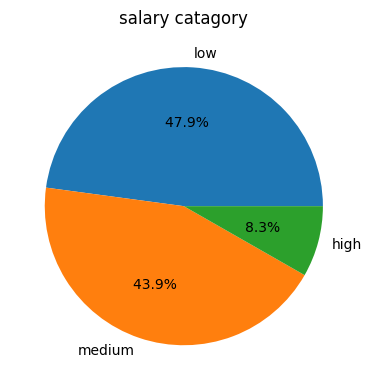

In [ ]:
#ploting the piechart for "salary catagory"
plt.figure(figsize=(4,4))
plt.pie(x=df["salary"].value_counts(),labels=labels, autopct = "%1.1f%% " )
plt.title("salary catagory")
plt.tight_layout()
plt.show()

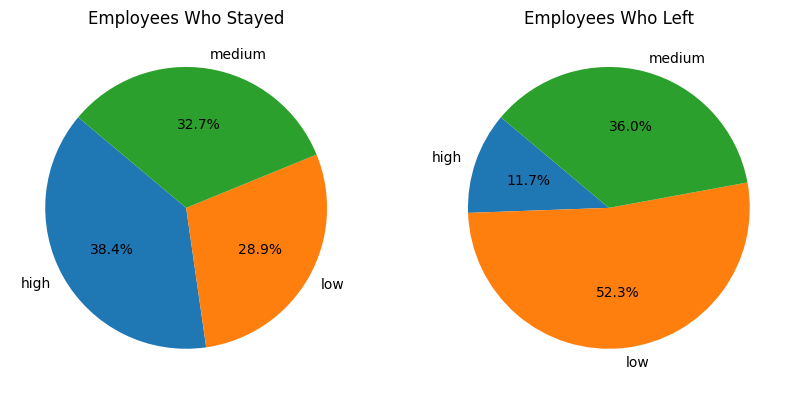

In [ ]:
#To compare the distribution of high, medium, and low salary rates among employees who stay and leave

import pandas as pd
import matplotlib.pyplot as plt

# Load the dataset (replace 'file_path' with the actual path to your CSV file)
file_path = '/content/drive/MyDrive/HR_comma_sep.csv'
df = pd.read_csv(file_path)
# Group by salary and retention status
grouped = df.groupby(['salary', 'left']).size().unstack(fill_value=0)

# Calculate proportions
proportions = grouped.div(grouped.sum(axis=1), axis=0)

# Separate data for stayed and left
stayed = proportions[0]
left = proportions[1]

# Plot pie charts
fig, axes = plt.subplots(1, 2, figsize=(10,10))

# Pie chart for employees who stayed
axes[0].pie(stayed, labels=stayed.index, autopct='%1.1f%%', startangle=140)
axes[0].set_title('Employees Who Stayed')

# Pie chart for employees who left
axes[1].pie(left, labels=left.index, autopct='%1.1f%%', startangle=140)
axes[1].set_title('Employees Who Left')

plt.show()


#Data Preprocessing

In [ ]:
df.rename(columns={"sales":"department","salary":"salary_level"},inplace=True)

In [ ]:
df.columns

Index(['satisfaction_level', 'last_evaluation', 'number_project',
       'average_montly_hours', 'time_spend_company', 'Work_accident', 'left',
       'promotion_last_5years', 'department', 'salary_level'],
      dtype='object')

Categorial Encoding use one hot encoding

In [ ]:
categorical_cols =["department","salary_level"]

encoded_cols = pd.get_dummies(df[categorical_cols], prefix= "cat")


In [ ]:
encoded_cols

,cat_IT,cat_RandD,cat_accounting,cat_hr,cat_management,cat_marketing,cat_product_mng,cat_sales,cat_support,cat_technical,cat_high,cat_low,cat_medium
0,False,False,False,False,False,False,False,True,False,False,False,True,False
1,False,False,False,False,False,False,False,True,False,False,False,False,True
2,False,False,False,False,False,False,False,True,False,False,False,False,True
3,False,False,False,False,False,False,False,True,False,False,False,True,False
4,False,False,False,False,False,False,False,True,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...
14994,False,False,False,False,False,False,False,False,True,False,False,True,False
14995,False,False,False,False,False,False,False,False,True,False,False,True,False
14996,False,False,False,False,False,False,False,False,True,False,False,True,False
14997,False,False,False,False,False,False,False,False,True,False,False,True,False


In [ ]:
df = df.join(encoded_cols)

In [ ]:
df.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,department,salary_level,...,cat_hr,cat_management,cat_marketing,cat_product_mng,cat_sales,cat_support,cat_technical,cat_high,cat_low,cat_medium
0,0.38,0.53,2,157,3,0,1,0,sales,low,...,False,False,False,False,True,False,False,False,True,False
1,0.80,0.86,5,262,6,0,1,0,sales,medium,...,False,False,False,False,True,False,False,False,False,True
2,0.11,0.88,7,272,4,0,1,0,sales,medium,...,False,False,False,False,True,False,False,False,False,True
3,0.72,0.87,5,223,5,0,1,0,sales,low,...,False,False,False,False,True,False,False,False,True,False
4,0.37,0.52,2,159,3,0,1,0,sales,low,...,False,False,False,False,True,False,False,False,True,False


In [ ]:
df.drop(["department","salary_level"] ,inplace= True, axis ="columns")

In [ ]:
df.columns

Index(['satisfaction_level', 'last_evaluation', 'number_project',
       'average_montly_hours', 'time_spend_company', 'Work_accident', 'left',
       'promotion_last_5years', 'cat_IT', 'cat_RandD', 'cat_accounting',
       'cat_hr', 'cat_management', 'cat_marketing', 'cat_product_mng',
       'cat_sales', 'cat_support', 'cat_technical', 'cat_high', 'cat_low',
       'cat_medium'],
      dtype='object')

In [ ]:
df.shape

(11991, 21)

#Min Max Scalling

In [ ]:
df["average_montly_hours"].min()

96

In [ ]:
df["average_montly_hours"].max()

310

#Split data into train and test

In [ ]:

X= df.drop("left",axis=1)
Y= df["left"]

In [ ]:
X.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years,cat_IT,cat_RandD,cat_accounting,cat_hr,cat_management,cat_marketing,cat_product_mng,cat_sales,cat_support,cat_technical,cat_high,cat_low,cat_medium
0,0.38,0.53,2,157,3,0,0,False,False,False,False,False,False,False,True,False,False,False,True,False
1,0.80,0.86,5,262,6,0,0,False,False,False,False,False,False,False,True,False,False,False,False,True
2,0.11,0.88,7,272,4,0,0,False,False,False,False,False,False,False,True,False,False,False,False,True
3,0.72,0.87,5,223,5,0,0,False,False,False,False,False,False,False,True,False,False,False,True,False
4,0.37,0.52,2,159,3,0,0,False,False,False,False,False,False,False,True,False,False,False,True,False


In [ ]:
Y.head()

0    1
1    1
2    1
3    1
4    1
Name: left, dtype: int64

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.8)

In [ ]:
X_train.shape

(2398, 20)

In [ ]:
X_test.shape

(9593, 20)

#Train Model using

Logistic Regression Model

In [ ]:
from sklearn.linear_model import LogisticRegression

In [ ]:
from sklearn.metrics import accuracy_score, classification_report , confusion_matrix

In [ ]:
logReg = LogisticRegression(max_iter=2000)

In [ ]:
logReg.fit(X_train,Y_train)

LogisticRegression(max_iter=2000)

In [ ]:
logReg_predictions = logReg.predict(X_test)

In [ ]:
accuracy_score(Y_test,logReg_predictions)

0.8334202022307933

In [ ]:
print(classification_report(Y_test,logReg_predictions))

              precision    recall  f1-score   support

           0       0.85      0.97      0.91      7987
           1       0.51      0.15      0.24      1606

    accuracy                           0.83      9593
   macro avg       0.68      0.56      0.57      9593
weighted avg       0.79      0.83      0.79      9593



In [ ]:
cm =confusion_matrix(Y_test,logReg_predictions)
cm

array([[7747,  240],
       [1358,  248]])

<function matplotlib.pyplot.show(close=None, block=None)>

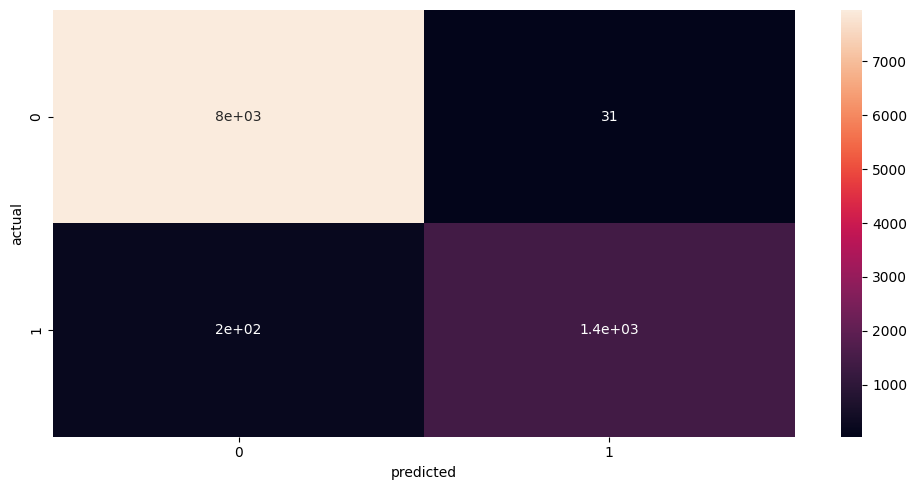

In [ ]:
plt.figure(figsize=(10,5))
sns.heatmap(cm,annot=True)
plt.xlabel("predicted")
plt.ylabel("actual")
plt.tight_layout()
plt.show

RandomForest

In [ ]:
from sklearn.ensemble import RandomForestClassifier

In [ ]:
ran_Forest= RandomForestClassifier(n_estimators=100)

In [ ]:
ran_Forest.fit(X_train,Y_train)

RandomForestClassifier()

In [ ]:
ran_Forest_predictions= ran_Forest.predict(X_test)

In [ ]:
accuracy_score(Y_test,ran_Forest_predictions)

0.9761284269780048

In [ ]:
print(classification_report(Y_test,ran_Forest_predictions))

              precision    recall  f1-score   support

           0       0.98      1.00      0.99      7987
           1       0.98      0.88      0.92      1606

    accuracy                           0.98      9593
   macro avg       0.98      0.94      0.96      9593
weighted avg       0.98      0.98      0.98      9593



In [ ]:
cm= confusion_matrix(Y_test,ran_Forest_predictions)
cm

array([[7956,   31],
       [ 198, 1408]])

<function matplotlib.pyplot.show(close=None, block=None)>

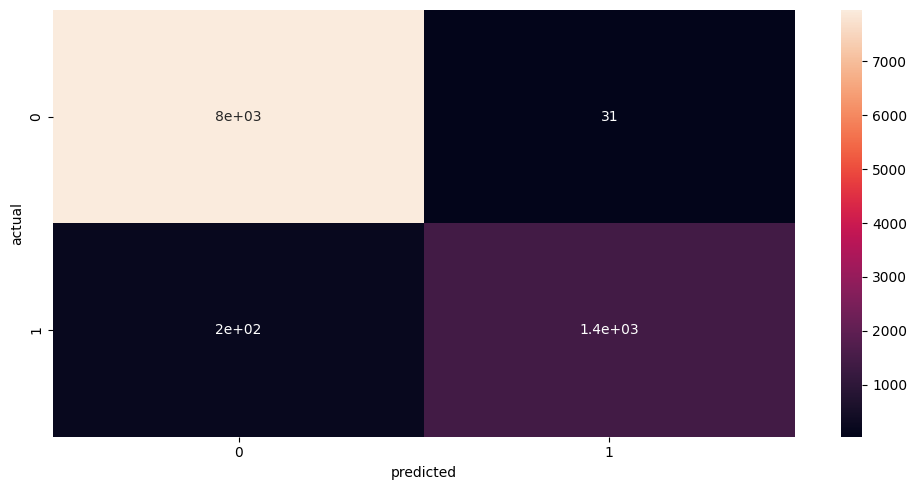

In [ ]:
plt.figure(figsize=(10,5))
sns.heatmap(cm,annot=True)
plt.xlabel("predicted")
plt.ylabel("actual")
plt.tight_layout()
plt.show

#Hyper parameter Tuning

In [ ]:
from sklearn.model_selection import  StratifiedKFold,  GridSearchCV

In [ ]:
parameter ={ 'criterion': ["gini", "entropy"],
    "n_estimators": [10, 100, 150, 200],
    "min_samples_leaf": [1, 2, 4, 6],
    "max_features": ["auto", "sqrt", "log2"]

}

In [ ]:
KFold = StratifiedKFold(n_splits=5)

In [ ]:
clf = GridSearchCV(ran_Forest,parameter,scoring = "accuracy", n_jobs= 2, cv=KFold)

In [ ]:
clf.fit(X_train, Y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=None, shuffle=False),
             estimator=RandomForestClassifier(), n_jobs=2,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'min_samples_leaf': [1, 2, 4, 6],
                         'n_estimators': [10, 100, 150, 200]},
             scoring='accuracy')

In [ ]:
clf.get_params()

{'cv': StratifiedKFold(n_splits=5, random_state=None, shuffle=False),
 'error_score': nan,
 'estimator__bootstrap': True,
 'estimator__ccp_alpha': 0.0,
 'estimator__class_weight': None,
 'estimator__criterion': 'gini',
 'estimator__max_depth': None,
 'estimator__max_features': 'sqrt',
 'estimator__max_leaf_nodes': None,
 'estimator__max_samples': None,
 'estimator__min_impurity_decrease': 0.0,
 'estimator__min_samples_leaf': 1,
 'estimator__min_samples_split': 2,
 'estimator__min_weight_fraction_leaf': 0.0,
 'estimator__n_estimators': 100,
 'estimator__n_jobs': None,
 'estimator__oob_score': False,
 'estimator__random_state': None,
 'estimator__verbose': 0,
 'estimator__warm_start': False,
 'estimator': RandomForestClassifier(),
 'n_jobs': 2,
 'param_grid': {'criterion': ['gini', 'entropy'],
  'n_estimators': [10, 100, 150, 200],
  'min_samples_leaf': [1, 2, 4, 6],
  'max_features': ['auto', 'sqrt', 'log2']},
 'pre_dispatch': '2*n_jobs',
 'refit': True,
 'return_train_score': False,
 '

In [ ]:
clf.best_score_

0.9758159359777314

In [ ]:
clf.score(X_test, Y_test)

0.9767538830397164

Save Model

In [ ]:
import pickle

In [ ]:
with open("model.pkl", "wb") as model_file:
  pickle.dump(clf, model_file)